In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import os
import PIL
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [3]:
data_dir = tf.keras.utils.get_file('flower_photos',cache_dir='.', origin=dataset_url, untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib


In [6]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [8]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [9]:
roses=list(data_dir.glob('roses/*.jpg'))

In [10]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

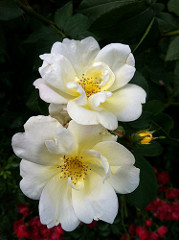

In [11]:
PIL.Image.open(str(roses[0]))

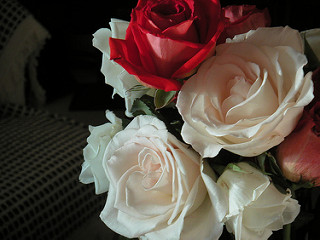

In [12]:
PIL.Image.open(str(roses[1]))

In [13]:
roses=list(data_dir.glob('tulips/*.jpg'))

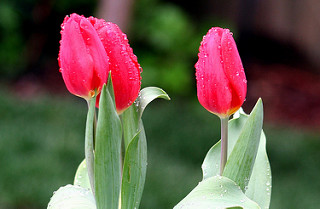

In [14]:
PIL.Image.open(str(roses[0]))

In [15]:
flowers_images_dict={
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [16]:
flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [17]:
flowers_labels_dict={
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' :4,
    
}

In [18]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [19]:
img.shape

(240, 179, 3)

In [20]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

In [21]:
x,y=[],[]
for flower_name,images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))


roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [22]:
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(100,100))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
y[:5]

[0, 0, 0, 0, 0]

In [24]:
x[0]

array([[[ 5, 20, 12],
        [ 4, 20, 11],
        [ 5, 21, 10],
        ...,
        [22, 48, 30],
        [21, 47, 30],
        [24, 51, 34]],

       [[13, 20, 13],
        [11, 19, 12],
        [ 7, 21, 10],
        ...,
        [23, 46, 32],
        [21, 44, 29],
        [23, 47, 32]],

       [[12, 22, 14],
        [10, 21, 13],
        [10, 22, 12],
        ...,
        [26, 49, 35],
        [23, 46, 28],
        [21, 45, 25]],

       ...,

       [[ 5, 17,  9],
        [ 7, 15,  8],
        [ 3, 10,  4],
        ...,
        [ 6, 17,  7],
        [ 6, 11,  6],
        [ 1,  3,  2]],

       [[11, 22, 15],
        [12, 21, 11],
        [15, 23, 13],
        ...,
        [ 3, 11,  4],
        [ 7, 15,  8],
        [ 1,  4,  1]],

       [[17, 26, 25],
        [17, 24, 17],
        [16, 23, 13],
        ...,
        [ 1,  9,  2],
        [ 2, 12,  2],
        [ 1,  8,  2]]], dtype=uint8)

In [25]:
x=np.array(x)
y=np.array(y)

In [26]:
x

array([[[[  5,  20,  12],
         [  4,  20,  11],
         [  5,  21,  10],
         ...,
         [ 22,  48,  30],
         [ 21,  47,  30],
         [ 24,  51,  34]],

        [[ 13,  20,  13],
         [ 11,  19,  12],
         [  7,  21,  10],
         ...,
         [ 23,  46,  32],
         [ 21,  44,  29],
         [ 23,  47,  32]],

        [[ 12,  22,  14],
         [ 10,  21,  13],
         [ 10,  22,  12],
         ...,
         [ 26,  49,  35],
         [ 23,  46,  28],
         [ 21,  45,  25]],

        ...,

        [[  5,  17,   9],
         [  7,  15,   8],
         [  3,  10,   4],
         ...,
         [  6,  17,   7],
         [  6,  11,   6],
         [  1,   3,   2]],

        [[ 11,  22,  15],
         [ 12,  21,  11],
         [ 15,  23,  13],
         ...,
         [  3,  11,   4],
         [  7,  15,   8],
         [  1,   4,   1]],

        [[ 17,  26,  25],
         [ 17,  24,  17],
         [ 16,  23,  13],
         ...,
         [  1,   9,   2],
        

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [29]:
len(x_train)

2752

In [30]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9),
#     layers.experimental.preprocessing.RandomZoom(0.8),
#     layers.experimental.preprocessing.RandomZoom(0.5),
#     layers.experimental.preprocessing.RandomZoom(0.6),
    layers.experimental.preprocessing.RandomZoom(0.7),
    layers.experimental.preprocessing.RandomZoom(0.4),
    layers.experimental.preprocessing.RandomZoom(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.2),
#     layers.experimental.preprocessing.RandomZoom(0.3),
    
    layers.experimental.preprocessing.RandomContrast(0.1),
#     layers.experimental.preprocessing.RandomContrast(0.2),
#     layers.experimental.preprocessing.RandomContrast(0.3),
#     layers.experimental.preprocessing.RandomContrast(0.4),
    layers.experimental.preprocessing.RandomContrast(0.5),
#     layers.experimental.preprocessing.RandomContrast(0.6),
#     layers.experimental.preprocessing.RandomContrast(0.7),
#     layers.experimental.preprocessing.RandomContrast(0.8),
    layers.experimental.preprocessing.RandomContrast(0.9),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(100,100,3)),
   
])

In [31]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
num_classes=5



In [32]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),#best 0.2 generalization
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax'),
    
])

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [34]:
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30


C:\Users\alish\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 5s 16ms/step - loss: 1.4638 - accuracy: 0.3314
Epoch 2/30
86/86 [==============================] - 1s 16ms/step - loss: 1.3190 - accuracy: 0.4211
Epoch 3/30
86/86 [==============================] - 1s 16ms/step - loss: 1.2608 - accuracy: 0.4618
Epoch 4/30
86/86 [==============================] - 1s 16ms/step - loss: 1.2229 - accuracy: 0.4767
Epoch 5/30
86/86 [==============================] - 1s 16ms/step - loss: 1.1755 - accuracy: 0.5084
Epoch 6/30
86/86 [==============================] - 1s 16ms/step - loss: 1.1909 - accuracy: 0.5011
Epoch 7/30
86/86 [==============================] - 1s 16ms/step - loss: 1.1603 - accuracy: 0.5345
Epoch 8/30
86/86 [==============================] - 1s 16ms/step - loss: 1.1801 - accuracy: 0.5196
Epoch 9/30
86/86 [==============================] - 1s 16ms/step - loss: 1.1328 - accuracy: 0.5352
Epoch 10/30
86/86 [==============================] - 1s 16ms/step - loss: 1.1482 - accuracy: 0.5316
Epoch 11/30
86/86 [=

In [35]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 0s 8ms/step - loss: 0.8285 - accuracy: 0.6623


[0.8285033106803894, 0.6623093485832214]

In [36]:
y_pred=model.predict(x_test_scaled)

In [37]:
#test me

In [50]:
img1=cv2.imread('daisy.jpg')
resized_img1=cv2.resize(img1,(100,100))
resized_img1

array([[[149,  84,  16],
        [149,  84,  16],
        [149,  84,  16],
        ...,
        [168, 129,  97],
        [170, 130, 101],
        [171, 131, 102]],

       [[149,  84,  16],
        [150,  85,  17],
        [150,  85,  17],
        ...,
        [168, 129,  97],
        [170, 130, 101],
        [170, 130, 101]],

       [[150,  85,  17],
        [150,  85,  17],
        [150,  85,  17],
        ...,
        [171, 130,  97],
        [169, 131,  97],
        [170, 132,  98]],

       ...,

       [[138, 165, 186],
        [171, 181, 195],
        [185, 189, 194],
        ...,
        [130, 178, 196],
        [ 75, 155, 172],
        [ 52, 146, 152]],

       [[152, 178, 199],
        [169, 186, 199],
        [164, 172, 183],
        ...,
        [131, 184, 216],
        [ 76, 156, 181],
        [ 63, 141, 158]],

       [[160, 194, 212],
        [152, 188, 207],
        [108, 154, 179],
        ...,
        [102, 182, 244],
        [ 54, 154, 215],
        [ 88, 163, 204]]

In [51]:
img2=cv2.imread('sunflower.jpg')
resized_img2=cv2.resize(img2,(100,100))
resized_img2

array([[[ 72, 134, 120],
        [ 82, 143, 133],
        [ 87, 147, 136],
        ...,
        [ 47,  79,  68],
        [ 60,  82,  70],
        [ 70,  90,  75]],

       [[ 53, 121, 106],
        [ 60, 128, 117],
        [ 74, 140, 128],
        ...,
        [ 51,  87,  73],
        [ 51,  84,  70],
        [ 50,  82,  65]],

       [[ 48, 111,  97],
        [ 45, 118, 102],
        [ 52, 124, 112],
        ...,
        [ 65,  97,  78],
        [ 59,  94,  74],
        [ 51,  90,  69]],

       ...,

       [[ 16,  54,  36],
        [ 19,  64,  48],
        [ 17,  67,  49],
        ...,
        [ 24,  70,  51],
        [ 70, 115,  98],
        [103, 134, 118]],

       [[ 18,  70,  53],
        [ 20,  80,  62],
        [ 31,  86,  70],
        ...,
        [ 20,  74,  57],
        [ 37,  89,  80],
        [  7,  55,  40]],

       [[ 23,  84,  66],
        [ 24,  94,  74],
        [ 35, 100,  84],
        ...,
        [ 74, 103,  91],
        [ 82, 105,  95],
        [ 68, 103,  87]]

In [52]:
y_pred_1=model.predict(resized_img1[None,...])
y_pred_2=model.predict(resized_img2[None,...])

In [53]:
y_pred_1_classe=np.argmax(y_pred_1)
y_pred_1_classe

1

In [54]:
y_pred_2_classe=np.argmax(y_pred_2)
y_pred_2_classe

3

In [41]:
y_pred

array([[7.58509804e-03, 9.79268193e-01, 6.15192344e-03, 3.22459964e-03,
        3.77033791e-03],
       [3.61119270e-01, 1.03920236e-01, 3.95559780e-02, 7.15485513e-02,
        4.23855960e-01],
       [7.51837483e-03, 2.41937451e-02, 9.65332508e-01, 1.27378125e-05,
        2.94263219e-03],
       ...,
       [3.47132562e-03, 1.61636446e-03, 8.25492889e-02, 8.94409060e-01,
        1.79539286e-02],
       [1.72687754e-01, 2.11937249e-01, 3.78467292e-01, 7.97837228e-02,
        1.57124057e-01],
       [2.69480385e-02, 2.46178987e-03, 2.53353659e-02, 8.24390769e-01,
        1.20864011e-01]], dtype=float32)

In [42]:
#score=tf.nn.softmax(y_pred[0])

In [43]:
y_pred_classes=[np.argmax(element) for element in y_pred]

In [44]:
y_pred_classes[:10]

[1, 4, 2, 0, 3, 3, 4, 4, 3, 4]

In [45]:
y_test[:10]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4])

In [46]:
data_augmentation=keras.Sequential([
    
    
    layers.experimental.preprocessing.RandomZoom(0.9),
    layers.experimental.preprocessing.RandomZoom(0.8),
    layers.experimental.preprocessing.RandomZoom(0.5),
    layers.experimental.preprocessing.RandomZoom(0.6),
    layers.experimental.preprocessing.RandomZoom(0.7),
    layers.experimental.preprocessing.RandomZoom(0.4),
    layers.experimental.preprocessing.RandomContrast(0.9),
    layers.experimental.preprocessing.RandomRotation(0.3),
   
])


In [47]:
data_augmentation(x).shape

TensorShape([3670, 100, 100, 3])

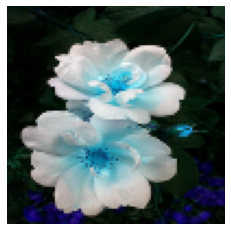

In [48]:
plt.axis('off')
plt.imshow(x[0])

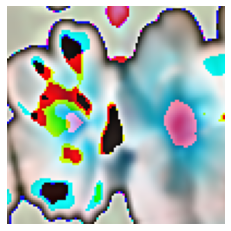

In [49]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))#convert to numpy array